In [18]:
#only keeping the features which have a feature loading value more than 0.2 for PC1
#drop time, events, wearable, soc, cvip, cpu, gpu, 5v_sys, wlan, nvme_pwr1, nvme_pwr3, vddp_run, vddp_s5, LPDDR_PWR, PROC_TOT_PWR

In [199]:
import pandas as pd 
dataset = pd.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\BurgsDevelopment\Jai Data Analysis\blinds_edited.csv")
print(dataset.columns)

Index(['time', 'wearable', 'soc', 'cvip', 'cpu', 'gpu', '5v_sys', 'wlan',
       'nvme_pwr1', 'nvme_pwr3', 'nvme_pwr2', 'vddp_run', 'vddp_s5',
       'LPDDR_PWR', 'PROC_TOT_PWR', 'THERM_TOT_PWR', 'THERM_TOT_PWR-throttle',
       'Tboard_soc1tmp', 'Tdiode_soc1tmp', 'battery', 'chrgr', 'ddr1', 'ddr2',
       'mem', 'mero2', 'vrm'],
      dtype='object')


In [201]:
#dropping the appropriate columns 
dataset.drop('wearable', axis=1, inplace = True)
dataset.drop('soc', axis=1, inplace = True)
dataset.drop('cvip', axis=1, inplace = True)
dataset.drop('cpu', axis=1, inplace = True)
dataset.drop('gpu', axis=1, inplace = True)
dataset.drop('5v_sys', axis=1, inplace = True )
dataset.drop('wlan', axis=1, inplace = True)
dataset.drop('nvme_pwr1', axis=1, inplace = True)
dataset.drop('nvme_pwr2', axis=1, inplace = True)
dataset.drop('nvme_pwr3', axis=1, inplace = True)
dataset.drop('vddp_s5', axis=1, inplace = True )
dataset.drop('LPDDR_PWR', axis=1, inplace = True )
dataset.drop('PROC_TOT_PWR', axis=1, inplace = True)
dataset.drop('THERM_TOT_PWR', axis=1, inplace = True)

In [203]:
dataset['vddp_run_ma']=dataset['vddp_run'].rolling(window=5, center = True).mean()
dataset['THERM_TOT_PWR-throttle_ma']=dataset['THERM_TOT_PWR-throttle'].rolling(window=5, center = True).mean()
dataset['Tboard_soc1tmp_ma']=dataset['Tboard_soc1tmp'].rolling(window=5, center = True).mean()
dataset['Tdiode_soc1tmp _ma']=dataset['Tdiode_soc1tmp'].rolling(window=5, center = True).mean()
dataset['battery_ma']=dataset['battery'].rolling(window=5, center = True).mean()
dataset['chrgr_ma']=dataset['chrgr'].rolling(window=5, center = True).mean()
dataset['ddr1_ma']=dataset['ddr1'].rolling(window=5, center = True).mean()
dataset['ddr2_ma']=dataset['ddr2'].rolling(window=5, center = True).mean()
dataset['mem_ma']=dataset['mem'].rolling(window=5, center = True).mean()
dataset['mero2_ma']=dataset['mero2'].rolling(window=5, center = True).mean()


In [205]:
#standardizing 
col_names = dataset.columns
col_values = dataset.values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model = scaler.fit(col_values)
col_values = model.transform(col_values)
df = pd.DataFrame(col_values, columns=col_names)

<Axes: xlabel='time'>

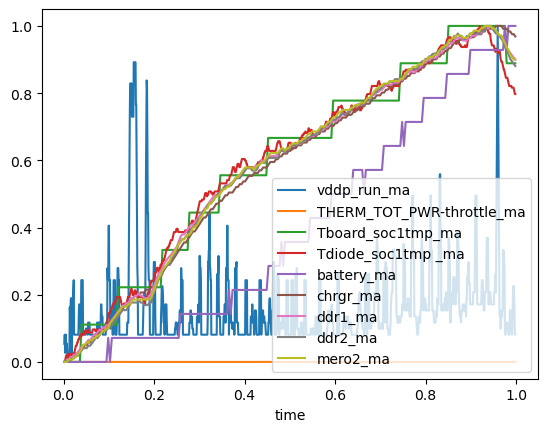

In [217]:
df.plot(x='time', y=['vddp_run_ma','THERM_TOT_PWR-throttle_ma','Tboard_soc1tmp_ma', 'Tdiode_soc1tmp _ma', 'battery_ma', 'chrgr_ma', 'ddr1_ma', 'ddr2_ma', 'mero2_ma'])